In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/My\ Drive/cnn_mnist

/content/drive/My Drive/cnn_mnist


In [ ]:
import os, sys, time
import numpy as np
import tensorflow as tf
from cnn_model import build_model, train_step, val_step, train_epochs

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#------------------------------------------------------------
# 1. prepare dataset
digits = load_digits()  # dict
print('digits.target.shape =', digits.target.shape) #(1797,)
print('digits.images.shape =', digits.images.shape) #(1797, 8, 8)

# Images shape (8,8) for input_shape 
X = digits.images ; y = digits.target
# Split data into train and test subsets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True)
# Add a channels dimension: 
Xtrain = Xtrain[..., tf.newaxis].astype("float32")
Xtest  = Xtest[..., tf.newaxis].astype("float32")

Xval = Xtrain[:200]
yval = ytrain[:200]
Xtrain = Xtrain[200:]
ytrain = ytrain[200:]
#------------------------------------------------------------
# Use SparseCategoricalCrossentropy, 
# Don't have to convert the labels into one-hot-encodes
# your targets(labels) are integers 0, 1, 2, 3....9
train_dataset = tf.data.Dataset.from_tensor_slices((Xtrain, ytrain)).batch(128)
val_dataset = tf.data.Dataset.from_tensor_slices((Xval, yval)).batch(128)
print('Xtrain.shape =', Xtrain.shape)
print('ytrain.shape =', ytrain.shape)
print('Xval.shape =', Xval.shape)
print('yval.shape =', yval.shape)
print('Xtest.shape =', Xtest.shape)
print('ytest.shape =', ytest.shape)


digits.target.shape = (1797,)
digits.images.shape = (1797, 8, 8)
Xtrain.shape = (1237, 8, 8, 1)
ytrain.shape = (1237,)
Xval.shape = (200, 8, 8, 1)
yval.shape = (200,)
Xtest.shape = (360, 8, 8, 1)
ytest.shape = (360,)


In [ ]:
#-------------------------------------------------------------
#   2. SETUP MODEL and pass it to train_epochs
input_shape = (8,8,1)
num_classes = 10
model = build_model(input_shape, num_classes)
model.summary()
epochs=50
history = train_epochs(train_dataset,val_dataset,model, epochs)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 32)          320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2

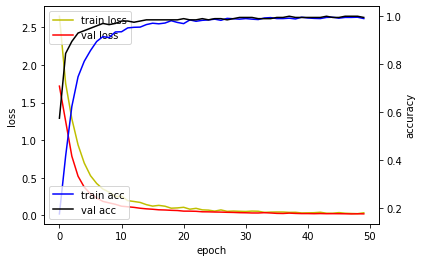

In [ ]:
#------------------------------------------------------------
#   4. Plot training loss/acc and validation loss/acc
#   : Display the training process
%matplotlib inline
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(history['loss'], 'y', label='train loss')
loss_ax.plot(history['val_loss'], 'r', label='val loss')
acc_ax.plot(history['acc'], 'b', label='train acc')
acc_ax.plot(history['val_acc'], 'k', label='val acc') # k for black
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()
